In [1]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
"""Load data..."""

import load
df = load.loadDF(1e11)

#Slice required columns
df_reviews = df[['reviewText','category']]

category = df_reviews.category.unique()
data = [[str(i) for i in df_reviews[df_reviews.category == cat]['reviewText']] for cat in category] 

len(category)

11

In [10]:
n_samples = 20
n_features = 100000
n_components = 10
n_top_words = 10


In [4]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [5]:
"""COUNT VECTORIZER FOR LDA"""
ct_vectorizer = CountVectorizer(min_df=0.01,max_features=n_features,
                                stop_words='english')

ct_vectorizer.fit([i for j in data for i in j])

ct = [ct_vectorizer.transform(i) for i in data]


print('A total of %s features extracted' %(len(ct_vectorizer.get_feature_names())))
print('First 20 features extracted:')
ct_vectorizer.get_feature_names()[0:20]

A total of 377 features extracted
First 20 features extracted:


['10',
 '100',
 '20',
 'able',
 'absolutely',
 'action',
 'actually',
 'add',
 'ago',
 'amazing',
 'amazon',
 'aren',
 'arrived',
 'art',
 'available',
 'away',
 'awesome',
 'bad',
 'based',
 'beat']

In [6]:
"""Stemmed vectroizer"""
import multiprocessing as mp
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

def stemm_1item(it):
    return ' '.join([stemmer.stem(word) for word in it.split(' ')])
    
#new_corpus=[stemm_1item(text) for text in data]

with mp.Pool() as pool:
    new_corpus = pool.map(stemm_1item, [i for j in data for i in j])

ct_vectorizer.fit(new_corpus)

ct = [ct_vectorizer.transform(i) for i in data]

print('A total of %s features extracted' %(len(ct_vectorizer.get_feature_names())))
print('First 20 features extracted:')
ct_vectorizer.get_feature_names()[0:20]

A total of 412 features extracted
First 20 features extracted:


['10',
 '100',
 '20',
 'abl',
 'absolut',
 'action',
 'actual',
 'ad',
 'add',
 'addit',
 'ago',
 'allow',
 'alreadi',
 'alway',
 'amaz',
 'amazon',
 'ani',
 'anoth',
 'anyon',
 'anyth']

In [7]:
"""Lemmatized Vectorizer"""
from nltk.stem import WordNetLemmatizer
lemmer=WordNetLemmatizer()

def lemm_1item(it):
    return ' '.join([lemmer.lemmatize(word, pos = 'v') for word in it.split(' ')])

with mp.Pool() as pool:
    new_corpus = pool.map(lemm_1item, [i for j in data for i in j])

ct_vectorizer.fit(new_corpus)

ct = [ct_vectorizer.transform(i) for i in data]

print('A total of %s features extracted' %(len(ct_vectorizer.get_feature_names())))
print('First 20 features extracted:')
ct_vectorizer.get_feature_names()[0:20]

A total of 375 features extracted
First 20 features extracted:


['10',
 '100',
 '20',
 'able',
 'absolutely',
 'action',
 'actually',
 'add',
 'ago',
 'allow',
 'amaze',
 'amazing',
 'amazon',
 'aren',
 'arrive',
 'art',
 'available',
 'away',
 'awesome',
 'bad']

In [31]:
"""Performing LDA on Vectorized set"""
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,
                                n_jobs=-1)

for cat in range(7,8):
    lda_fit = lda.fit(ct[cat])
    print("\nTopics in LDA model for %s:" %(category[cat]), "\n")
    tf_feature_names = ct_vectorizer.get_feature_names()
    print_top_words(lda_fit, tf_feature_names, n_top_words)


Topics in LDA model for Video_Games: 

Topic #0: price great fast worth items happy purchase perfect item time
Topic #1: product case excellent amazon box cheap class screen expected black
Topic #2: good sound 10 story graphics short pretty music ok decent
Topic #3: controller xbox games use super pc used button video ve
Topic #4: like just really don good feel thing didn think know
Topic #5: works great work day favorite days issue fine card problems
Topic #6: game like time just games play story really way ve
Topic #7: game fun play love games great like really lot online
Topic #8: new version original old year years better ones color ago
Topic #9: game great best awesome games graphics amazing series fan buy



In [13]:
len([i for j in data for i in j])

2068055

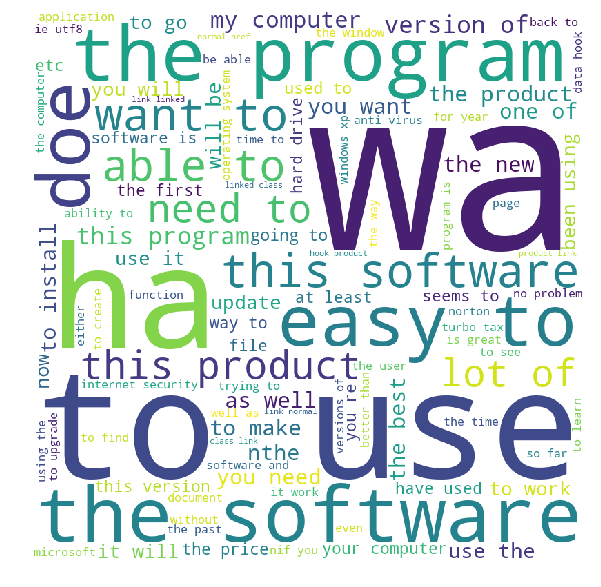

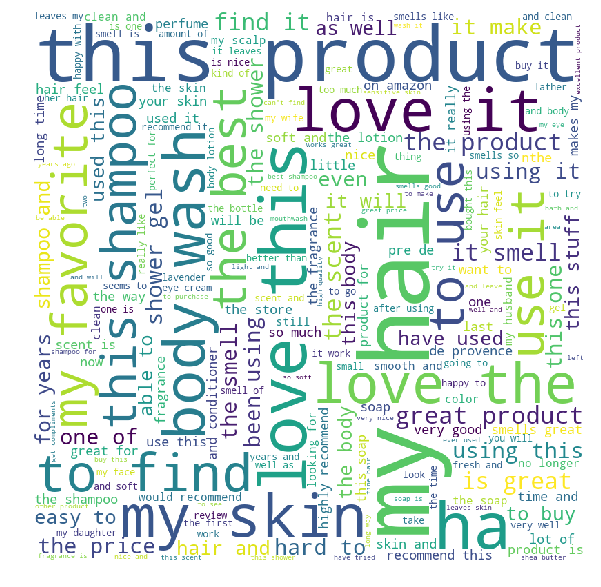

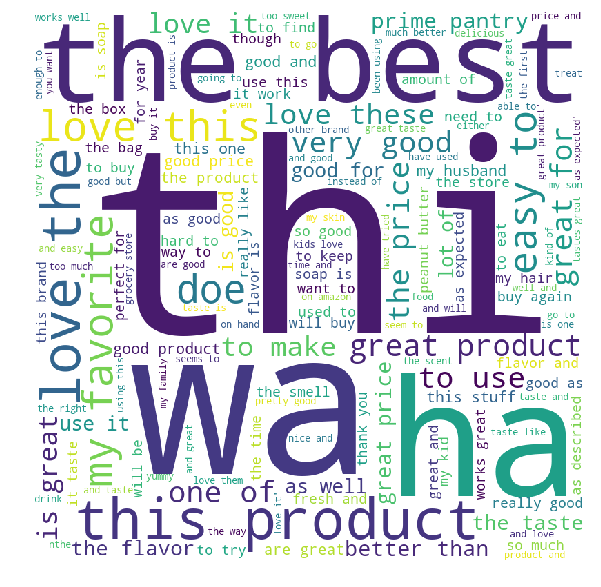

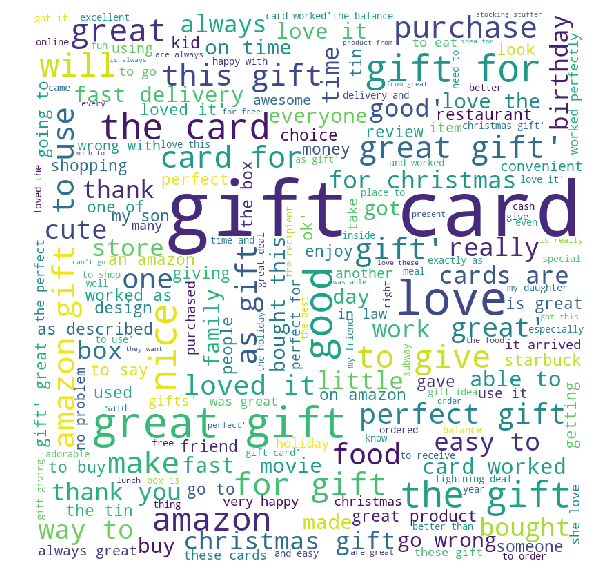

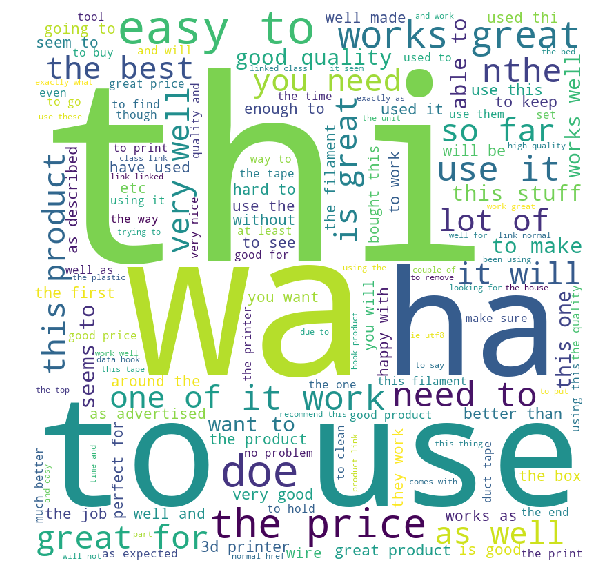

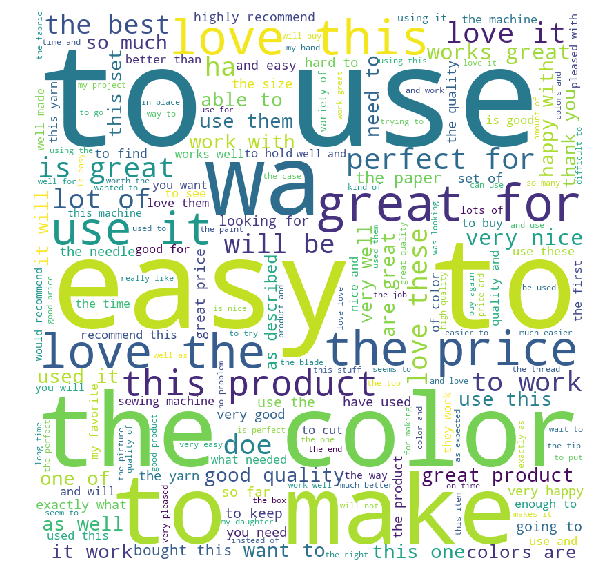

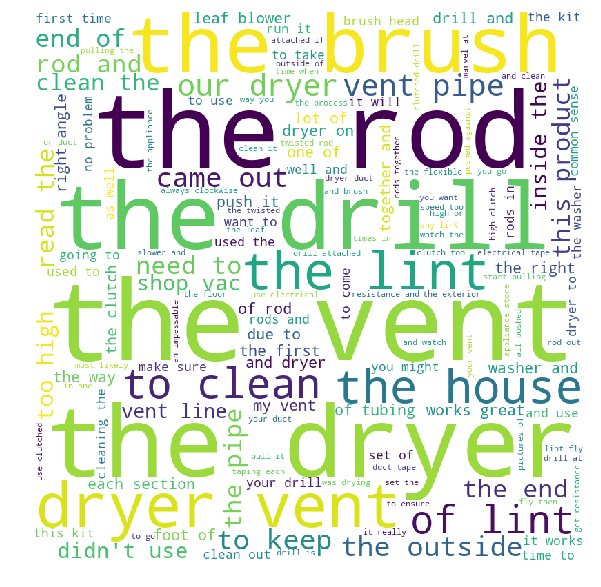

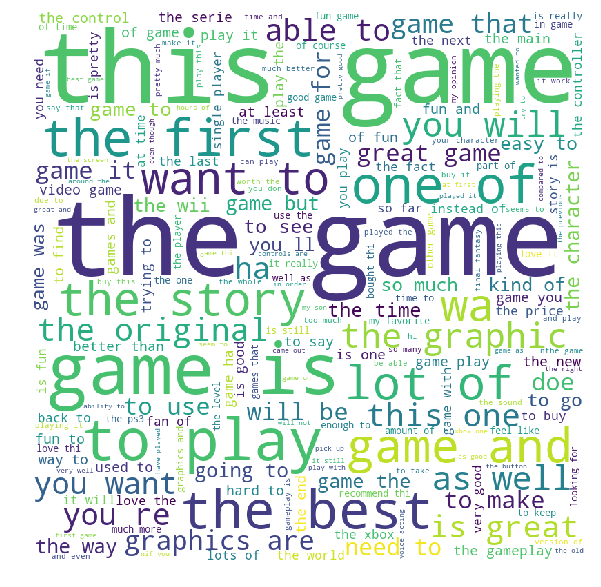

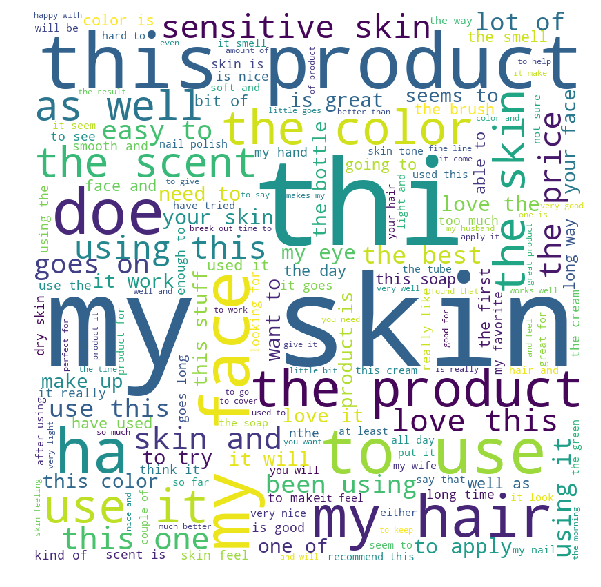

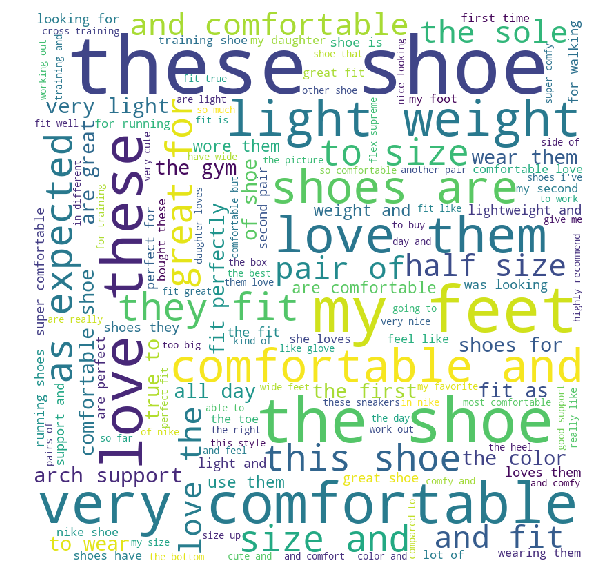

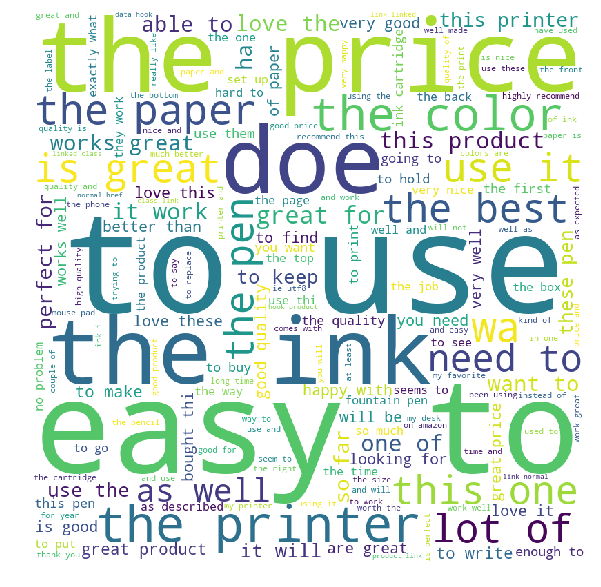

In [19]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
# Reads data files
#df = load.loadDF()



stopwords = set(STOPWORDS) 


# iterate through the csv file 
for val in data: 
    j=0
    comment_words = '' 
    # typecaste each val to string 
    val = str(val)
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.savefig('wordcount_%s.png' %(category[j])) 
    j+=1


In [23]:
for cat in range(0,1):
    print(cat)

0
